Importación de bibliotecas

In [1]:
import random
import time
import math
import matplotlib.pyplot as plt
import pandas as pd
from qiskit import transpile, assemble
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import GroverOperator


Registro global de los tiempos de ejecución

In [32]:
# Crear el registro global
execution_log = []

Creación de lista desordenada

In [101]:
N = 67108864 

arr = random.sample(range(1, N + 1), N)  
random.shuffle(arr)  
# Imprimir los últimos 10 elementos de la lista
print(f'Últimos 10 elementos de la lista: {arr[-10:]}')

Últimos 10 elementos de la lista: [47565095, 25864223, 57210142, 7150502, 20978183, 51970215, 20179978, 17879071, 30093221, 44883102]


Asignación del objetivo a buscar en la lista

In [102]:
target = 44883102
#target =random.choice(arr)

print(f'Número objetivo (target): {target}')

Número objetivo (target): 44883102


Búsqueda lineal

In [103]:
def linear_search(arr, target):
    """
    Implementación de búsqueda clásica (lineal)
    """
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

# Medir el tiempo de búsqueda clásica
start_time = time.time()
index_classic = linear_search(arr, target)
end_time = time.time()


# Calcular el tiempo de búsqueda
classic_time = end_time - start_time
execution_log.append({'Algorithm': 'Classic', 'N': N, 'Time': classic_time})
print(f'Índice del objetivo encontrado (búsqueda clásica): {index_classic}')
print(f'Tiempo de búsqueda clásica: {classic_time} segundos')


Índice del objetivo encontrado (búsqueda clásica): 67108863
Tiempo de búsqueda clásica: 23.643994569778442 segundos


Búqueda Hash

In [104]:
def hash_search(arr, target):
    """
    Implementación de búsqueda utilizando tabla hash
    """
    # Crear la tabla hash
    hash_table = {value: index for index, value in enumerate(arr)}
    # Buscar el objetivo
    return hash_table.get(target, -1)

# Medir el tiempo de búsqueda con tabla hash
start_time = time.time()
index_hash = hash_search(arr, target)
end_time = time.time()

# Calcular el tiempo de búsqueda
hash_time = end_time - start_time
execution_log.append({'Algorithm': 'Hash', 'N': N, 'Time': hash_time})
print(f'Índice del objetivo encontrado (búsqueda con hash): {index_hash}')
print(f'Tiempo de búsqueda con hash: {hash_time} segundos')

Índice del objetivo encontrado (búsqueda con hash): 67108863
Tiempo de búsqueda con hash: 128.65385150909424 segundos


Algoritmo de Grover

In [110]:
n_qubits = math.ceil(math.log2(N))

# Convertir el objetivo a binario
target_bin = format(target, f'0{n_qubits}b')

grover_circuit = QuantumCircuit(n_qubits)

grover_circuit.h(range(n_qubits))

# Oráculo dinámico
def oracle(circuit, target_bin):
    """
    Este oráculo ajusta dinámicamente las puertas X en función del estado objetivo (target_bin).
    Luego, aplica una puerta Z controlada para invertir la fase del estado objetivo.
    """
    for i, bit in enumerate(target_bin):
        if bit == '0':
            circuit.x(i)  # Aplicar X si el bit es 0 (inversión)
    circuit.h(n_qubits - 1)
    circuit.mcx(list(range(n_qubits - 1)), n_qubits - 1)  # Multi-controlled-X
    circuit.h(n_qubits - 1)
    for i, bit in enumerate(target_bin):
        if bit == '0':
            circuit.x(i)  # Restaurar el estado original con X

# Aplicar el oráculo para el estado objetivo
oracle(grover_circuit, target_bin)

# Operador difusor (operador de inversión sobre el promedio)
def diffuser(circuit):
    """
    Aplica la transformación del difusor (inversión sobre el promedio).
    """
    circuit.h(range(n_qubits))
    circuit.x(range(n_qubits))
    circuit.h(n_qubits - 1)
    circuit.mcx(list(range(n_qubits - 1)), n_qubits - 1)
    circuit.h(n_qubits - 1)
    circuit.x(range(n_qubits))
    circuit.h(range(n_qubits))

# Aplicar el difusor
diffuser(grover_circuit)

# Añadir mediciones
grover_circuit.measure_all()

# Simulador AER
simulator = AerSimulator()

# Medir el tiempo de ejecución cuántica
start_time = time.time()

# Transpilar y ejecutar el circuito en el simulador
compiled_circuit = transpile(grover_circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()

end_time = time.time()
quantum_time = end_time - start_time

counts = result.get_counts(grover_circuit)

print(f'Resultado de la búsqueda cuántica (Grover): {counts}')
print(f'Tiempo de búsqueda cuántica (Grover): {quantum_time} segundos')

most_frequent_state = max(counts, key=counts.get)
print(f'Estado con mayor ocurrencia: {most_frequent_state} con {counts[most_frequent_state]} ocurrencias')

execution_log.append({'Algorithm': 'Grover', 'N': N, 'Time': quantum_time})
# Visualizar el histograma de los resultados
#plot_histogram(counts)




Resultado de la búsqueda cuántica (Grover): {'01000000010100101011001110': 1, '11010101100100000000000011': 1, '00101000101000000011101001': 1, '11111111011100001100111100': 1, '10000011010011100011111000': 1, '10110010100010011101111010': 1, '10110000100110110001100001': 1, '01010001010011111100011100': 1, '00110011001010101110010001': 1, '01000011110010100101111111': 1, '00111111010010000000001001': 1, '01110001011010111010010111': 1, '01001001001001010100001011': 1, '01011011110011100001011101': 1, '00110011111111111100000110': 1, '11000011101101010001111101': 1, '10101001110101100000011001': 1, '10111010000111111010101110': 1, '00000010001000110010001000': 1, '11111100110000110010111101': 1, '11001000010000000110110100': 1, '10010001011100000110111111': 1, '01001111011000101101111000': 1, '10001100101000000110001100': 1, '00100110111101110101101111': 1, '00110001001100100101100010': 1, '10010000000011010110000001': 1, '00101111000000111011000100': 1, '10101000000100001011101100': 1

Comparación de Tiempos

In [111]:
# Comparación de tiempos
print(f'--- Comparación de tiempos ---')
print(f'Tiempo de búsqueda clásica: {classic_time} segundos')
print(f'Tiempo de búsqueda con hash: {hash_time} segundos')
print(f'Tiempo de búsqueda cuántica (Grover): {quantum_time} segundos')

# Evaluar la eficiencia
if quantum_time < classic_time:
    print('La búsqueda cuántica fue más rápida que la búsqueda lineal.')
else:
    print('La búsqueda lineal fue más rápida que la búsqueda cuántica.')

if quantum_time < hash_time:
    print('La búsqueda con cuántica fue más rápida que la búsqueda con hash.')
else:
    print('La búsqueda con hash fue más rápida que la búsqueda con cuántica.')

# Datos adicionales importantes
print(f'Tamaño de la lista: {N}')
print(f'Número de qubits usados en la búsqueda cuántica: {n_qubits}')


--- Comparación de tiempos ---
Tiempo de búsqueda clásica: 23.643994569778442 segundos
Tiempo de búsqueda con hash: 128.65385150909424 segundos
Tiempo de búsqueda cuántica (Grover): 4.7711591720581055 segundos
La búsqueda cuántica fue más rápida que la búsqueda lineal.
La búsqueda con cuántica fue más rápida que la búsqueda con hash.
Tamaño de la lista: 67108864
Número de qubits usados en la búsqueda cuántica: 26


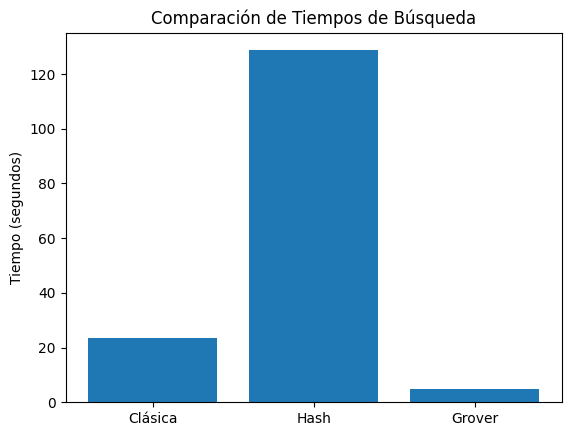

In [112]:
labels = ['Clásica', 'Hash', 'Grover']
times = [classic_time, hash_time, quantum_time]

plt.bar(labels, times)
plt.ylabel('Tiempo (segundos)')
plt.title('Comparación de Tiempos de Búsqueda')
plt.show()


Registro de Resultados

In [113]:
# Crear un DataFrame para visualizar los resultados
df = pd.DataFrame(execution_log)

# Mostrar los resultados en el notebook
from IPython.display import display
display(df)

# Guardar en un archivo CSV
df.to_csv('execution_times.csv', index=False)


,Algorithm,N,Time
0,Classic,128,0.000000
1,Hash,128,0.000000
2,Grover,128,0.053039
3,Classic,1024,0.000000
4,Hash,1024,0.000000
5,Grover,1024,0.101614
6,Classic,32768,0.003000
7,Hash,32768,0.005999
8,Grover,32768,0.070962
9,Classic,131072,0.018999


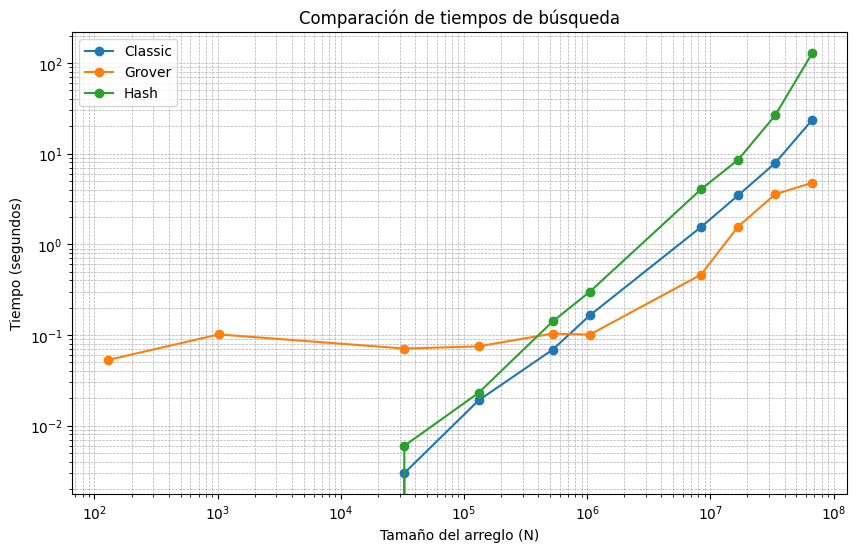

In [115]:
# Agrupar para eliminar duplicados, manteniendo el último valor
df_grouped = df.groupby(['N', 'Algorithm'], as_index=False).last()

# Pivotar para convertir en formato ancho
df_pivot = df_grouped.pivot(index='N', columns='Algorithm', values='Time')

# Graficar los resultados
plt.figure(figsize=(10, 6))

for algorithm in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[algorithm], marker='o', label=algorithm)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tamaño del arreglo (N)')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparación de tiempos de búsqueda')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()




Código opcional

In [59]:
n_qubits = math.ceil(math.log2(N))

# Convertir el objetivo a binario
target_bin = format(target, f'0{n_qubits}b')

# Crear el circuito de Grover
grover_circuit = QuantumCircuit(n_qubits)

# Inicialización en superposición
grover_circuit.h(range(n_qubits))

# Función para calcular el número óptimo de iteraciones
def get_optimal_iterations(N):
    return int((math.pi / 4) * math.sqrt(N))

# Oráculo dinámico
def oracle(circuit, target_bin):
    """
    Este oráculo ajusta dinámicamente las puertas X en función del estado objetivo (target_bin).
    Luego, aplica una puerta Z controlada para invertir la fase del estado objetivo.
    """
    for i, bit in enumerate(target_bin):
        if bit == '0':
            circuit.x(i)  # Aplicar X si el bit es 0 (inversión)
    circuit.h(n_qubits - 1)
    circuit.mcx(list(range(n_qubits - 1)), n_qubits - 1)  # Multi-controlled-X
    circuit.h(n_qubits - 1)
    for i, bit in enumerate(target_bin):
        if bit == '0':
            circuit.x(i)  # Restaurar el estado original con X

# Operador difusor (operador de inversión sobre el promedio)
def diffuser(circuit):
    """
    Aplica la transformación del difusor (inversión sobre el promedio).
    """
    circuit.h(range(n_qubits))
    circuit.x(range(n_qubits))
    circuit.h(n_qubits - 1)
    circuit.mcx(list(range(n_qubits - 1)), n_qubits - 1)
    circuit.h(n_qubits - 1)
    circuit.x(range(n_qubits))
    circuit.h(range(n_qubits))

# Calcular el número óptimo de iteraciones
num_iterations = get_optimal_iterations(N)

# Aplicar el oráculo y el difusor en un bucle
for _ in range(num_iterations):
    oracle(grover_circuit, target_bin)
    diffuser(grover_circuit)

# Añadir mediciones
grover_circuit.measure_all()

# Simulador AER
simulator = AerSimulator()

# Medir el tiempo de ejecución cuántica
start_time = time.time()

# Transpilar y ejecutar el circuito en el simulador
compiled_circuit = transpile(grover_circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()

end_time = time.time()
quantum_time = end_time - start_time

counts = result.get_counts(grover_circuit)

print(f'Resultado de la búsqueda cuántica (Grover): {counts}')
print(f'Tiempo de búsqueda cuántica (Grover): {quantum_time} segundos')

# Identificar el estado con la mayor concurrencia
most_frequent_state = max(counts, key=counts.get)
print(f'Estado con mayor ocurrencia: {most_frequent_state} con {counts[most_frequent_state]} ocurrencias')

# Visualizar el histograma de los resultados
# plot_histogram(counts)  # Descomentar para visualizar


Resultado de la búsqueda cuántica (Grover): {'111111011101111110': 1024}
Tiempo de búsqueda cuántica (Grover): 5.981569528579712 segundos
Estado con mayor ocurrencia: 111111011101111110 con 1024 ocurrencias
